In [1]:
# test read_topo.py
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from read_topo import load_topo_arctic
latTOPO, lonTOPO, topo = load_topo_arctic()

In [2]:
from mystats import bandpass
# Demonstrate the use of the filter.
# First make some data to be filtered.
fs = 30.0       # sample rate, Hz
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
# Filter the data
w, minff, maxff, ff, hl = bandpass( data,1,30,10,2 )
#
# plt.plot(t, data, 'b-', label='data')
# plt.plot(t, w, 'g-', linewidth=2, label='filtered data')
# plt.plot(t, y, 'r-', linewidth=2, label='y')
# plt.xlabel('Time [sec]')
# plt.grid()
# plt.legend()
# plt.show()

lowband, highband [0.06666666666666667, 0.2]


lowband, highband [0.06666666666666667, 0.2]


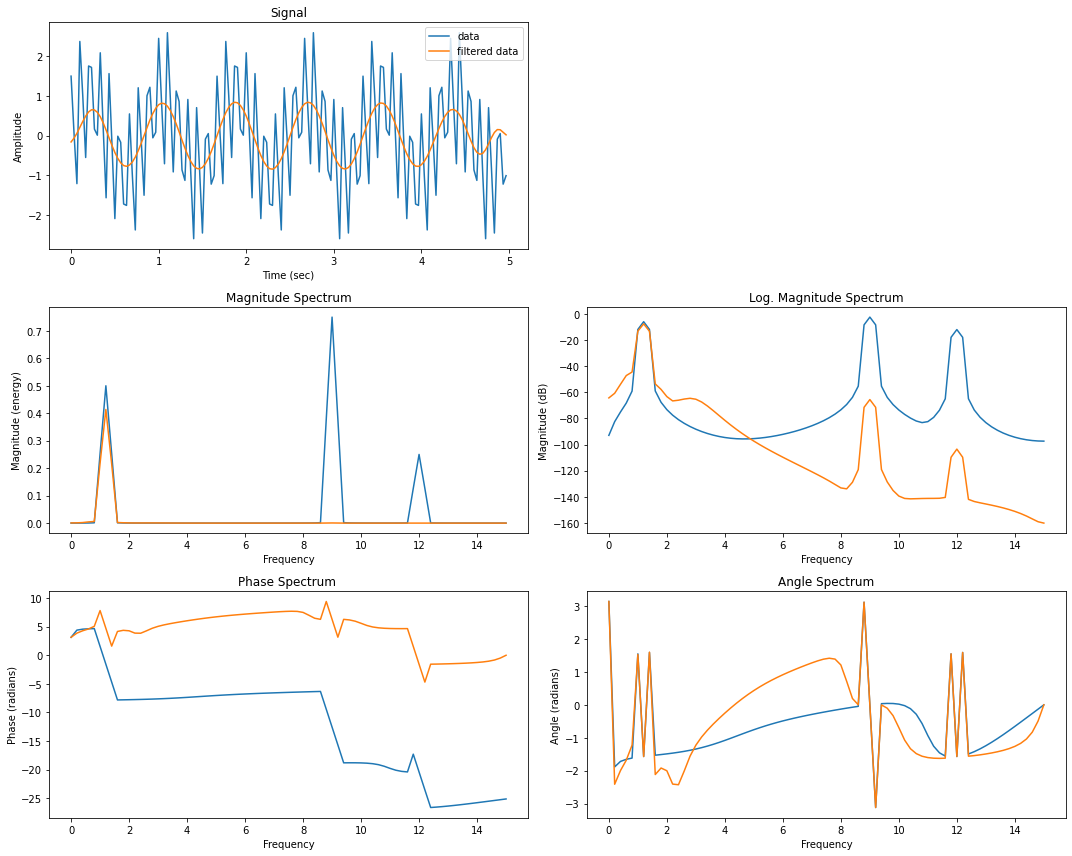

In [15]:
### test https://matplotlib.org/stable/gallery/lines_bars_and_markers/spectrum_demo.html
### test spectrum representations
# Demonstrate the use of the filter.
# First make some data to be filtered.
fs = 30.0       # sample rate, Hz
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
plt.gcf().set_size_inches(15, 12)
# Filter the data
w, minff, maxff, ff, hl = bandpass( data,1,30,10,2 )

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, data, color='C0')
axs[0, 0].plot(t, w, color='C1')
axs[0, 0].set_xlabel("Time (sec)")
axs[0, 0].set_ylabel("Amplitude")
axs[0, 0].legend(['data','filtered data'])
# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(data, Fs=fs, color='C0')
axs[1, 0].magnitude_spectrum(w, Fs=fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(data, Fs=fs, scale='dB', color='C0')
axs[1, 1].magnitude_spectrum(w, Fs=fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(data, Fs=fs, color='C0')
axs[2, 0].phase_spectrum(w, Fs=fs, color='C1')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(data, Fs=fs, color='C0')
axs[2, 1].angle_spectrum(w, Fs=fs, color='C1')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.savefig('test_signal_spectrum.png',dpi=400,bbox_inches='tight',transparent='True')
plt.show()


In [1]:
import os
import sys
path_nhchi = os.path.expanduser('~/Documents/nhchi_work_2022/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from read_SD_ADCP_data import load_SD_nc_arctic2019, load_tide_current_arctic2019

year = '2019'
SD_name = ['1035','1036','1037']
for i in range(len(SD_name)):
    timeSD, lonSD, latSD, depthSD, uSD, vSD = load_SD_nc_arctic2019(year,SD_name[i])
    uSD_tide, vSD_tide = load_tide_current_arctic2019(SD_name[i])

Successfully load 1035
shape of lon, lat, u:  (29303,) (29303,) shape of u:  (29303, 50)
Succesfully load tidal current of 1035
Successfully load 1036
shape of lon, lat, u:  (25095,) (25095,) shape of u:  (25095, 50)
Succesfully load tidal current of 1036
Successfully load 1037
shape of lon, lat, u:  (25954,) (25954,) shape of u:  (25954, 50)
Succesfully load tidal current of 1037


Successfully load 1020
shape of lon, lat, u:  (28267,) (28267,) shape of u:  (28267, 50)


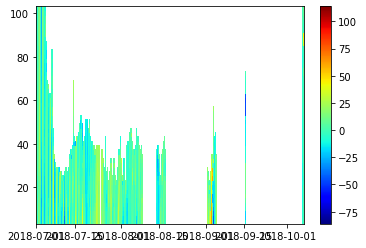

In [3]:
import os
import sys
path_nhchi = os.path.expanduser('~/Documents/nhchi_work_2022/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from read_SD_ADCP_data import load_SD_nc_arctic2018

year = '2018'
SD_name = ['1020']
for i in range(len(SD_name)):
    timeSD, lonSD, latSD, depthSD, uSD, vSD = load_SD_nc_arctic2018(year,SD_name[i])
    # uSD_tide, vSD_tide = load_tide_current_arctic2019(SD_name[i])
import matplotlib.pyplot as plt
plt.pcolor(timeSD, depthSD, uSD.transpose(), cmap='jet')
plt.colorbar()

In [3]:
import os
import sys
import datetime
import numpy as np
path_nhchi = os.path.expanduser('~/Documents/nhchi_work_2022/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from convert_time import datetime_to_yearday

# test = np.array([datetime.datetime(2019,1,15,12,0,5),datetime.datetime(2019,1,16)])
test = datetime.datetime(2019,1,15,12,0,5)
# test = np.squeeze(np.array([[1,2],[3,4]]))
print(datetime_to_yearday(test))

(2019, 15.50005787037037)


nlost & begpt & endpt: 2 2 14
2 0 5
3 1 6
4 2 7
5 3 8
6 4 9
7 5 10
8 6 11
9 7 12
10 8 13
11 9 14
12 10 15
13 11 16
[ 0.  1.  2.  3. nan  5.  6.  7.  8.  9. nan 11. 12. 13. 14. 15.]
[  nan   nan  1.5   2.75  4.    5.25  6.5   7.    7.5   8.75 10.   11.25
 12.5  13.     nan   nan]


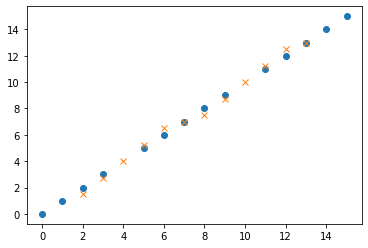

In [2]:
import numpy as np
import matplotlib.pyplot as plt
path_nhchi = os.path.expanduser('~/Documents/nhchi_work_2022/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from mystats import movingavg

# test mystats.py
test = np.array([0,1,2,3,np.nan,5,6,7,8,9,np.nan,11,12,13,14,15])
a = movingavg(test,5,2)
print(test)
print(a)
plt.plot(test,'o')
plt.plot(a,'x')


[ nan  1.   2.   3.   4.   5.   6.   nan  8.   9.  10.  11.  12.  13.
 14.  15.  16.5 17.5 18.  19.  20.  21.  22.  23.5 24.  25.  26.5 27.5
 28.  29. ]
len of x, xl, igood: 28 28 28
0 0


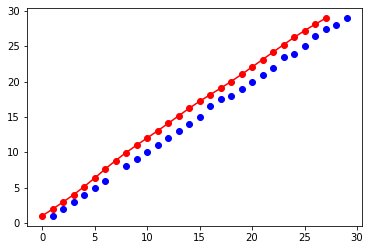

In [4]:
import numpy as np
import matplotlib.pyplot as plt
path_nhchi = os.path.expanduser('~/Documents/nhchi_work_2022/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from mystats import movingavg, lpass

test = np.array([np.nan,1,2,3,4,5,6,np.nan,8,9,10,11,12,13,14,15,16.5,17.5,18,19,20,21,22,23.5,24,25,26.5,27.5,28,29])
print(test)
# bad = np.isnan(test)
# print(bad)
# ibad = np.where(bad)[0]
# print(ibad, type(ibad))
# print(min(ibad))
# test1 = np.sum(np.diff(np.diff(ibad))^2)
# print(test1)
# test = np.delete(test,bad)
# print(test)
yl, ff, hl = lpass(test, 1, 8, 2)
plt.plot(test,'bo')
plt.plot(yl,'r-o')

[ 0.   nan  2.   3.   4.   5.   6.   nan  8.   9.  10.  11.  12.  13.
 14.  15.  16.5 17.5 18.  19.  20.  21.  22.  23.5 24.  25.  26.5 27.5
 28.  29. ]
14.516666666666667
[-14.51666667 -14.51666667 -12.51666667 -11.51666667 -10.51666667
  -9.51666667  -8.51666667  -8.51666667  -6.51666667  -5.51666667
  -4.51666667  -3.51666667  -2.51666667  -1.51666667  -0.51666667
   0.48333333   1.98333333   2.98333333   3.48333333   4.48333333
   5.48333333   6.48333333   7.48333333   8.98333333   9.48333333
  10.48333333  11.98333333  12.98333333  13.48333333  14.48333333]
yl [-0.10243563  0.88155613  1.86818082  2.85812862  3.84909264  4.84073824
  5.8364962   6.84216578  7.86125915  8.89168962  9.92844632 10.96758494
 12.00692081 13.04507748 14.08052013 15.11062057 16.13158525 17.14087596
 18.1406249  19.1373756  20.13809989 21.14706583 22.16498479 23.18955976
 24.2174106  25.24506464 26.26752217 27.27840884 28.27261983 29.24611138]


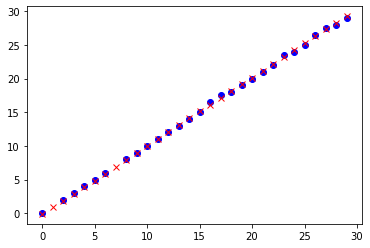

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
path_nhchi = os.path.expanduser('~/Documents/nhchi_work_2022/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from mystats import movingavg, lpass_NaN

x = np.array([0,np.nan,2,3,4,5,6,np.nan,8,9,10,11,12,13,14,15,16.5,17.5,18,19,20,21,22,23.5,24,25,26.5,27.5,28,29])
print(x)
plt.plot(x,'bo')
# test1 = lpass_NaN(test)
# yl = np.nan*np.ones(len(x))
# n = len(x);
# nbin = np.arange(0,n)
# bad = np.where( np.isnan(x) | np.isinf(x))[0]
# good = np.where( ~np.isnan(x) & ~np.isinf(x))[0]
# interpx = interpolate.interp1d(nbin[good],x[good],bounds_error=False,fill_value='extrapolate')(bad)
# print(interpx)
# x[bad] = interpx
# print(x)
yl, ff, hl = lpass_NaN(x,1,8,2)
print('yl',yl)
plt.plot(yl,'rx')